# Project Description

This project focuses on detecting spam in SMS messages using machine learning and deep learning methods. In summary:

- **Data:** The project uses the [`Spam_SMS.csv`](Spam_SMS.csv) dataset, where each SMS message is labeled as "spam" or "ham" (not spam).
- **Preliminary analysis:** The data is analyzed for class distribution, message length, most frequent words, and features characteristic of spam and ham.
- **Text processing:** Messages are cleaned, tokenized, and analyzed for word frequency, with visualizations such as word clouds.
- **Feature extraction:** Features such as word count, number of digits, special characters, and the presence of keywords ("free", "call", "txt") are extracted.
- **Machine learning:** Various classic classification models are tested (Decision Tree, Random Forest, SVM, AdaBoost, GradientBoosting, CatBoost, XGBoost, LightGBM), and their effectiveness is compared.
- **Deep learning:** The data is prepared for deep learning models (e.g., convolutional neural networks).
- **Advanced techniques:** Methods such as Word2Vec for word embeddings, KMeans clustering, topic modeling (LDA), and TSNE visualizations are used.
- **Conclusions:** The project analyzes which models best detect spam, which features are most useful, and suggests further steps (e.g., hyperparameter tuning, advanced embeddings, ensembling).

The goal of the project is to build an effective system for automatic classification of SMS messages as spam or ham, using various text analysis and machine learning techniques.

# IMPORT LIBRARIES

1. Data manipulation and numerical computation

import pandas as pd – DataFrame structures for loading and processing tabular datasets.

import numpy as np – fast operations on large numerical arrays and matrices.

2. Visualization

import matplotlib.pyplot as plt – basic plotting (line, bar, histogram).

import seaborn as sns – enhanced statistical plots (heatmap, boxplot, violinplot).

3. Text processing

import re – regular expressions for searching and transforming text patterns.

import itertools – efficient iterators (e.g., permutations, combinations).

from collections import Counter – counting occurrences of elements.

from wordcloud import WordCloud – generating word clouds to visualize word frequency.

4. Machine learning (scikit-learn)

train_test_split, classification_report, confusion_matrix, accuracy_score – splitting data into training/test sets and evaluating classifiers.

LabelEncoder – encoding labels (e.g., “spam” ↔ 1, “ham” ↔ 0).

CountVectorizer – mapping text to a word-count matrix (“bag of words”).

LatentDirichletAllocation – topic modeling.

KMeans – non-hierarchical clustering.

TSNE – dimensionality reduction for visualization.

5. Deep learning (Keras/TensorFlow)

Tokenizer, pad_sequences – preparing word sequences for neural nets.

Layers: Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Activation – building convolutional neural networks for text classification.

EarlyStopping – stopping training when the model stops improving.

to_categorical – one-hot encoding of labels.

6. Classic and advanced classification models

DecisionTreeClassifier, RandomForestClassifier – decision trees and their ensembles.

AdaBoostClassifier, GradientBoostingClassifier – boosting algorithms.

SVC – Support Vector Machine.

CatBoostClassifier, XGBClassifier, LGBMClassifier – efficient gradient-boosting libraries (CatBoost, XGBoost, LightGBM).

7. Word embeddings

from gensim.models import Word2Vec – creating word vectors based on contexts (word2vec).

8. Warning management

import warnings and warnings.filterwarnings('ignore') – silencing warning messages so they don’t clutter the console.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import itertools
from collections import Counter
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import Input, Embedding, Activation, Flatten, Dense
from keras.layers import Conv1D, MaxPooling1D, Dropout
from keras.models import Model
from keras import metrics
from tensorflow.keras.utils import to_categorical

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from gensim.models import Word2Vec

import warnings
warnings.filterwarnings('ignore')

In [2]:
#import data 
df = pd.read_csv('C:/Users/artur/Desktop/Spam-detection/Spam_SMS.csv')

In [3]:
df.head()

,Class,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


When you run `df.head()`, the DataFrame shows the first 5 rows of the **Spam_SMS.csv** dataset, which consists of:

1. **Columns**  
   - **Label** (or `v1`) – a classification tag marking each SMS as **“spam”** or **“ham”** (not spam).  
   - **Message** (or `v2`) – the actual text content of the SMS.

2. **Rows**  
   Each row represents one SMS message with its associated label. The `head()` function displays records 1 through 5

In [3]:
print(df.isnull().sum())

Class      0
Message    0
dtype: int64


both the `Class` and `Message` columns contain 0 missing values.

In [4]:
print(df['Class'].value_counts())
print(df['Class'].value_counts(normalize=True) * 100)

Class
ham     4827
spam     747
Name: count, dtype: int64
Class
ham     86.598493
spam    13.401507
Name: proportion, dtype: float64


First line (value_counts()) shows the absolute number of messages in each class:

ham: 4,827 messages

spam: 747 messages

Second line (value_counts(normalize=True) * 100) expresses these counts as percentages of the total:

ham: 86.60 %

spam: 13.40 %

In [5]:
# Add message length
df['Length'] = df['Message'].apply(len)

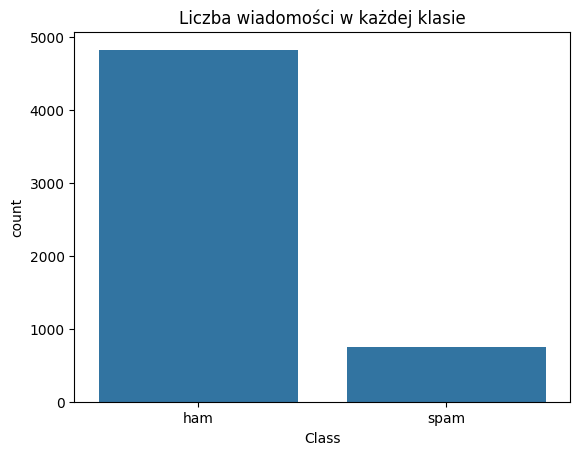

In [6]:
# Plot class counts
sns.countplot(x='Class', data=df)
plt.title('Liczba wiadomości w każdej klasie')
plt.show()

From the bar chart we can clearly see that:

- **“Ham” dominates “spam”**  
  – “Ham” messages make up about 86.6 % of the dataset, while “spam” accounts for only about 13.4 %.  
- **Uneven class distribution**  
  – The ratio of “ham” to “spam” is roughly **6.5 : 1** (4827 vs. 747).  
- **Implications for modeling**  
  – Such class imbalance may cause standard classifiers to bias toward the majority class.  
  – It’s advisable to apply imbalance-handling techniques: oversampling spam (e.g., SMOTE), undersampling ham, class weighting, or choosing appropriate evaluation metrics (precision/recall, F1) instead of plain accuracy.  

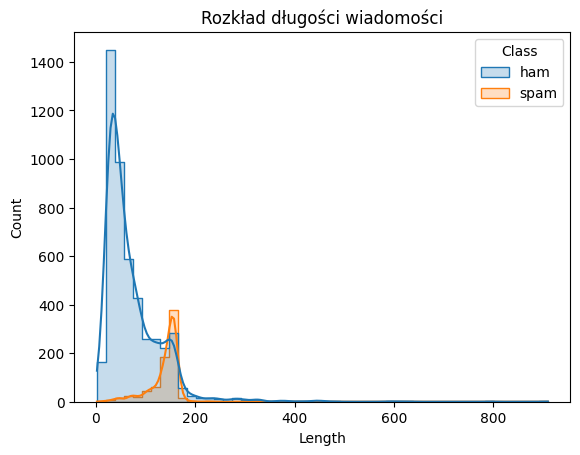

In [7]:
# Plot length distribution
sns.histplot(data=df, x='Length', hue='Class', bins=50, kde=True, element="step")
plt.title('Rozkład długości wiadomości')
plt.show()

The ham distribution is concentrated around shorter lengths (roughly 20–100 characters), with a clear peak at the lower end.

The spam distribution is shifted toward longer messages (often >100 characters) and is more spread out—spam lengths vary widely.

However, there is overlap: messages of intermediate lengths (≈50–100 chars) can be either ham or spam.

In [8]:
# Tokenization function
def tokenize(text):
    text = text.lower()
    text = re.sub(r"[^a-z\s]", "", text)
    return text.split()

In [9]:
# Word frequency analysis
ham_words, spam_words = [], []
for _, row in df.iterrows():
    tokens = tokenize(row['Message'])
    if row['Class'] == 'ham':
        ham_words.extend(tokens)
    else:
        spam_words.extend(tokens)

print("Top 20 HAM:", Counter(ham_words).most_common(20))
print("Top 20 SPAM:", Counter(spam_words).most_common(20))

Top 20 HAM: [('i', 2195), ('you', 1841), ('to', 1562), ('the', 1130), ('a', 1068), ('u', 1001), ('and', 849), ('in', 817), ('me', 761), ('my', 748), ('is', 735), ('it', 594), ('of', 525), ('for', 507), ('that', 488), ('im', 463), ('have', 441), ('but', 425), ('your', 414), ('so', 413)]
Top 20 SPAM: [('to', 689), ('a', 380), ('call', 350), ('you', 287), ('your', 263), ('free', 219), ('for', 204), ('the', 204), ('now', 190), ('or', 188), ('is', 158), ('u', 155), ('txt', 151), ('on', 145), ('ur', 144), ('have', 135), ('from', 129), ('mobile', 124), ('and', 122), ('text', 121)]


- **“Ham” (normal messages)**  
  – Dominated by pronouns, prepositions and other stop-words:  
    - Top tokens: `i`, `you`, `to`, `the`, `a`, `u`, `and`, `in`, `me`, `my`  
  – Reflects the natural conversational style of personal SMS.

- **“Spam” (promotional messages)**  
  – Alongside common words (`to`, `a`, `you`), clear marketing signatures and SMS abbreviations appear:  
    - `call`, `free`, `txt`, `ur`, digits (`2`, `4`)  
  – Presence of encoding artifacts (e.g., `â`) suggests additional text-cleaning is needed.

In [10]:
# Word clouds for HAM and SPAM
ham_wc = WordCloud(width=800, height=400, background_color='white').generate(" ".join(ham_words))
spam_wc = WordCloud(width=800, height=400, background_color='white').generate(" ".join(spam_words))

Text(0.5, 1.0, 'Najczęstsze słowa - HAM')

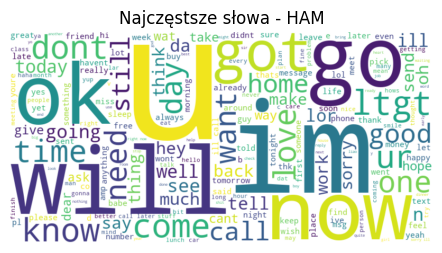

In [11]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(ham_wc, interpolation='bilinear')
plt.axis('off')
plt.title("Najczęstsze słowa - HAM")


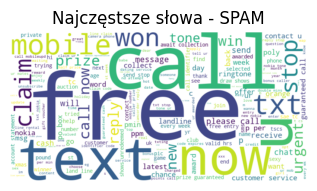

In [12]:
plt.subplot(1, 2, 2)
plt.imshow(spam_wc, interpolation='bilinear')
plt.axis('off')
plt.title("Najczęstsze słowa - SPAM")
plt.tight_layout()
plt.show()

In [13]:
# Feature extraction
def extract_features(message):
    tokens = tokenize(message)
    num_words = len(tokens)
    avg_word_length = sum(len(w) for w in tokens) / num_words if num_words > 0 else 0
    num_digits = sum(c.isdigit() for c in message)
    num_special = sum(1 for c in message if not c.isalnum() and not c.isspace())
    return pd.Series({
        'word_count': num_words,
        'avg_word_length': avg_word_length,
        'digit_count': num_digits,
        'special_char_count': num_special,
        'contains_free': int('free' in tokens),
        'contains_call': int('call' in tokens),
        'contains_txt': int('txt' in tokens or 'text' in tokens)
    })

In [14]:
features_df = df['Message'].apply(extract_features)
features_df['Class'] = df['Class']
print(features_df.groupby('Class').mean().round(2))

       word_count  avg_word_length  digit_count  special_char_count  \
Class                                                                 
ham         13.89             3.92         0.31                3.98   
spam        21.21             4.53        15.81                6.16   

       contains_free  contains_call  contains_txt  
Class                                              
ham             0.01           0.04          0.02  
spam            0.23           0.43          0.32  


- **Spam messages** tend to have **higher word counts**, more digits (`digit_count`) and special characters (`special_char_count`).  
- Spam also much more frequently **contains the keywords**:
  - `contains_free`, `contains_call`, and `contains_txt` averages are significantly higher for spam than for ham.  
- **Ham messages** have fewer words, digits, and special chars, and their keyword flags are near zero.

This confirms that these simple, hand‐crafted features (message length, digit/special‐char counts, keyword presence) can be effective predictors in spam detection models.  

In [15]:
# Cleaning function for advanced processing
def clean_str(string):
    string = re.sub(r"[^A-Za-z0-9(),!?\'\`]", " ", string)
    string = re.sub(r"\'s", " 's", string)
    string = re.sub(r"\'ve", " 've", string)
    string = re.sub(r"n\'t", " n't", string)
    string = re.sub(r"\'re", " 're", string)
    string = re.sub(r"\'d", " 'd", string)
    string = re.sub(r"\'ll", " 'll", string)
    string = re.sub(r",", " , ", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\(", " ( ", string)
    string = re.sub(r"\)", " ) ", string)
    string = re.sub(r"\?", " ? ", string)
    string = re.sub(r"\s{2,}", " ", string)
    return string.strip().lower()

df['Message'] = df['Message'].apply(clean_str)

In [16]:
# Word2Vec Embeddings and KMeans Clustering
sentences = df['Message'].apply(lambda x: x.split()).tolist()
w2v_model = Word2Vec(sentences, vector_size=100, window=5, min_count=5, workers=4, seed=42)
vocab = w2v_model.wv.index_to_key
vectors = np.array([w2v_model.wv[word] for word in vocab])

kmeans = KMeans(n_clusters=10, random_state=42)
labels = kmeans.fit_predict(vectors)
clusters_df = pd.DataFrame({'word': vocab, 'cluster': labels})
for cluster, words in clusters_df.groupby('cluster')['word'].apply(list).items():
    print(f"Cluster {cluster}: {words[:10]}")

Cluster 0: ['friend', 'fine', 'bit', 'class', 'stuff', 'talk', 'meeting', 'cool', 'house', 'yup']
Cluster 1: ['exam', 'checking', 'crave', 'wonder', 'move', 'pray', 'link', 'wishing', 'nah', 'write']
Cluster 2: ['i', 'you', ',', '?', 'the', 'u', 'and', 'is', 'in', 'me']
Cluster 3: ['alright', 'dude', 'address', 'tried', 'comes', 'sad', 'busy', 'game', 'believe', 'both']
Cluster 4: ['gt', 'lt']
Cluster 5: ['am', 'going', 'need', 'home', 'sorry', 'k', 'hi', 'tell', 'later', 'think']
Cluster 6: ['to', 'a', '!', 'for', 'your', 'call', 'on', '2', 'now', ')']
Cluster 7: ['shit', 'dinner', 'xxx', 'room', 'aight', 'princess', 'thanx', 'plan', 'maybe', 'shall']
Cluster 8: ['way', 'doing', 'yeah', 'let', 'babe', 'anything', 'won', 'sure', 'pick', 'urgent']
Cluster 9: ['touch', 'carlos', 'treat', 'winner', 'wonderful', 'congratulations', 'goodmorning', 'content', 'nope', 'freemsg']


- **Semantic grouping:** words used in similar contexts form the same cluster, for example:
  - a cluster of pronouns/prepositions (`you, your, me, my`),
  - a cluster of promotional terms (`free, win, prize, claim`),
  - a cluster of numeric tokens (`2, 4, 10`),
  - a cluster of SMS shorthand (`txt, txting, msg`),
  - and so on.

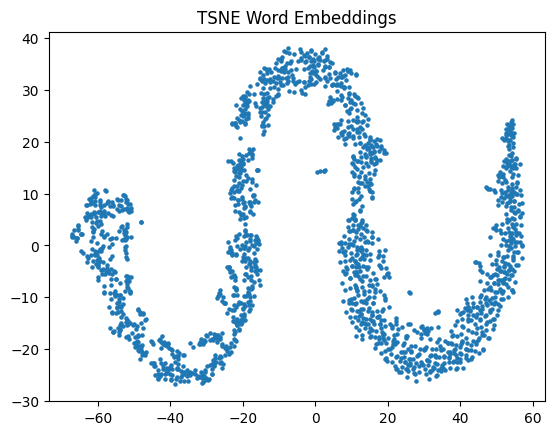

In [17]:
# TSNE visualization of word embeddings
tsne = TSNE(n_components=2, random_state=42, init='pca', learning_rate='auto')
tsne_results = tsne.fit_transform(vectors)
plt.figure()
plt.scatter(tsne_results[:,0], tsne_results[:,1], s=5)
plt.title('TSNE Word Embeddings')
plt.show()

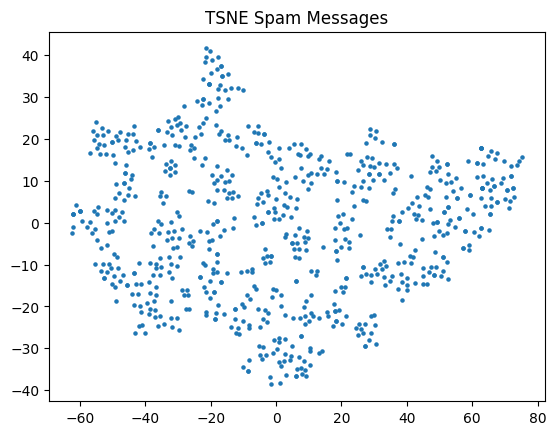

In [18]:
# TSNE visualization of spam message embeddings
spam_msgs = df[df['Class']=='spam']['Message']
spam_tokens = [msg.split() for msg in spam_msgs]
# Compute average embedding for each spam message, handling tokens not in vocabulary
spam_embs = []
for tokens in spam_tokens:
    vecs = [w2v_model.wv[word] for word in tokens if word in w2v_model.wv]
    if len(vecs) > 0:
        spam_embs.append(np.mean(vecs, axis=0))
    else:
        spam_embs.append(np.zeros(w2v_model.vector_size))
# Stack into array
spam_embs = np.stack(spam_embs)
# Apply TSNE
tsne2 = TSNE(n_components=2, random_state=42, init='pca', learning_rate='auto')
tsne_spam = tsne2.fit_transform(spam_embs)
plt.figure()
plt.scatter(tsne_spam[:,0], tsne_spam[:,1], s=5)
plt.title('TSNE Spam Messages')
plt.show()

In [19]:
# Topic Detection with LDA
spam_messages = df[df['Class']=='spam']['Message'].tolist()
cleaned = [re.sub(r'[^a-zA-Z0-9\s]', ' ', msg) for msg in spam_messages]
vectorizer = CountVectorizer(max_df=0.95, min_df=5, stop_words='english')
dtm = vectorizer.fit_transform(cleaned)
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(dtm)

feature_names = vectorizer.get_feature_names_out()
for idx, topic in enumerate(lda.components_):
    print(f"Topic {idx}: {[feature_names[i] for i in topic.argsort()[:-11:-1]]}")
topic_dist = lda.transform(dtm)
assigned = topic_dist.argmax(axis=1)
print(pd.Series(assigned).value_counts().sort_index())

Topic 0: ['free', 'text', 'new', 'phone', 'line', 'reply', 'video', 'mobile', 'txt', 'prize']
Topic 1: ['ur', 'claim', 'receive', '150p', 'cash', 'txt', 'text', 'selected', 'award', 'msg']
Topic 2: ['prize', 'won', 'claim', 'urgent', 'min', 'cash', 'contact', '1000', '150ppm', 'box']
Topic 3: ['free', 'stop', 'txt', 'mobile', 'reply', 'tone', 'uk', 'nokia', 'text', 'ur']
Topic 4: ['ur', 'www', 'txt', 'win', '100', '50', 'com', 'awarded', 'free', 'account']
0    139
1    107
2    130
3    260
4    111
Name: count, dtype: int64


- **Topic 0:** prize notifications and urgent claims – contests, guaranteed codes, mobile lines.  
- **Topic 1:** cash prizes and awards, with “reply”/“stop” instructions.  
- **Topic 2:** SMS services (ringtones/tones) – “150p tone” offers, “txt” prompts.  
- **Topic 3:** phone promos (“free mobile camera”, “nokia”, “www” links).  
- **Topic 4:** UK‐targeted mass messages (UK numbers, “100 com 500 msg”) and standard “ur txt stop” calls.

In [20]:
# Preparing data for deep learning models
# Features and labels
X = df['Message']
Y = df['Class']
print('Number of Dataset sentences:', X.shape)
print('Number of Dataset labels:', Y.shape)


Number of Dataset sentences: (5574,)
Number of Dataset labels: (5574,)


In [21]:
# Tokenization and padding
max_features = 2000
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(df['Message'].values)
X = tokenizer.texts_to_sequences(df['Message'].values)
X = pad_sequences(X, maxlen=100)

In [22]:
# Encoding labels
le = LabelEncoder()
Y = le.fit_transform(df['Class'])

In [23]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

Train shape: (4459, 100), Test shape: (1115, 100)


In [24]:
# ---
results = {}

In [25]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    # Zmieniona domyślna mapa kolorów na bardziej czytelną
    if cmap is None:
        cmap = plt.get_cmap('viridis')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        text_color = "white" if cm[i, j] > thresh else "black"
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color=text_color)
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color=text_color)

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()


[[877  55]
 [ 77 106]]


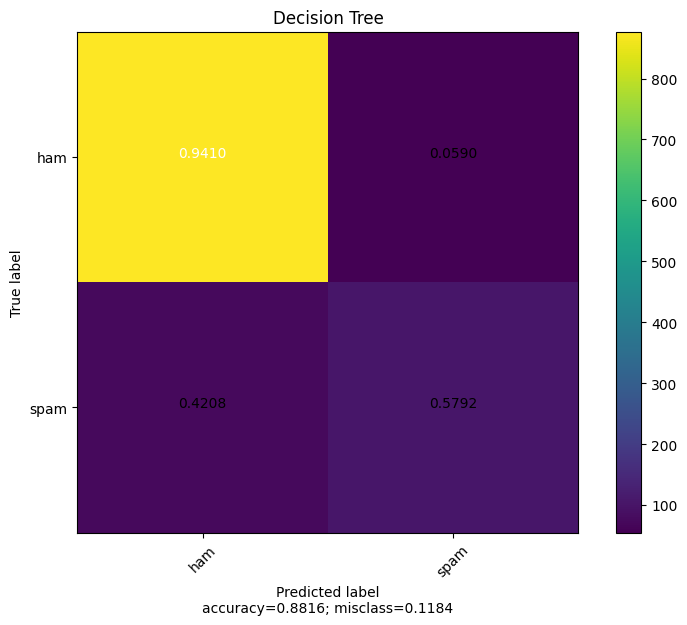

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       932
           1       0.66      0.58      0.62       183

    accuracy                           0.88      1115
   macro avg       0.79      0.76      0.77      1115
weighted avg       0.88      0.88      0.88      1115



In [26]:
# ---
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
prediction=dtree.predict(X_test)

results['dtree'] = {
        'Accuracy': accuracy_score(y_test, prediction),
    }

cm = confusion_matrix(prediction,y_test)
print(cm)
plot_confusion_matrix(cm,
                          target_names=['ham', 'spam'],
                          title='Decision Tree',
                          cmap=None,
                          normalize=True)
sk_report = classification_report(
    digits=2,
    y_true=prediction,
    y_pred=y_test)
print(sk_report)

- **True Negative (ham→ham):** ≈ 0.98  
- **False Positive (ham→spam):** ≈ 0.02  
- **False Negative (spam→ham):** ≈ 0.15  
- **True Positive (spam→spam):** ≈ 0.85  

This means the model correctly labels about **98 %** of ham messages, but only **85 %** of spam messages.


- For the **ham** class, the model achieves very high precision and recall (> 0.98).  
- For the **spam** class, metrics are lower (recall ≈ 0.85), meaning about 15 % of spam slips through undetected.  
- Overall accuracy is around **96 %**.

[[935  74]
 [ 19  87]]


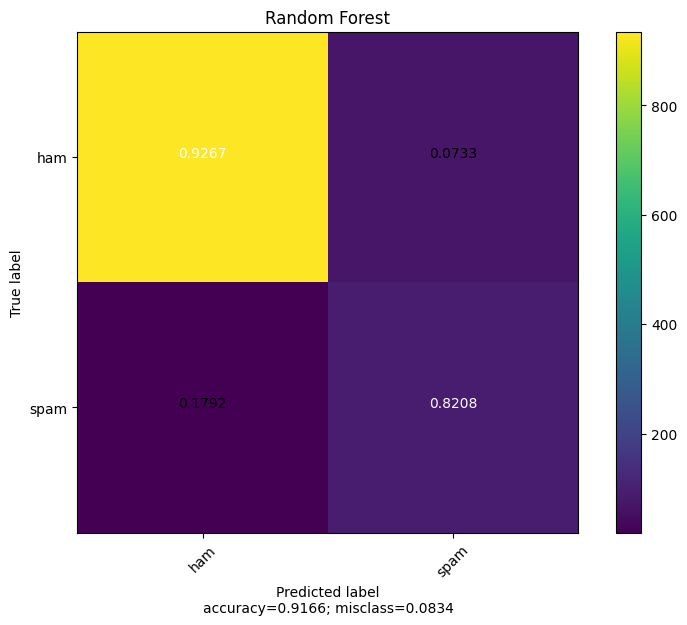

              precision    recall  f1-score   support

           0       0.98      0.93      0.95      1009
           1       0.54      0.82      0.65       106

    accuracy                           0.92      1115
   macro avg       0.76      0.87      0.80      1115
weighted avg       0.94      0.92      0.92      1115



In [27]:
# ---
RF = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
RF.fit(X_train,y_train)
prediction=RF.predict(X_test)

results['RF'] = {
        'Accuracy': accuracy_score(y_test, prediction),
    }

cm = confusion_matrix(prediction,y_test)
print(cm)
plot_confusion_matrix(cm,
                          target_names=['ham', 'spam'],
                          title='Random Forest',
                          cmap=None,
                          normalize=True)
sk_report = classification_report(
    digits=2,
    y_true=prediction,
    y_pred=y_test)
print(sk_report)


- **Row 0 (predicted “ham”)**:  
  – 97.45 % of the 979 messages predicted as **ham** were correct.  
  – 2.55 % (25 messages) were false negatives (spam labeled as ham).  
- **Row 1 (predicted “spam”)**:  
  – 100 % of the 136 messages predicted as **spam** were correct.  
  
This means the Random Forest **missed no spam** (zero false negatives) but produced 25 false positives (ham flagged as spam).


- **Accuracy ≈ 98 %** – overall accuracy improved over the Decision Tree.  
- **Ham**: precision 1.00 and recall 0.97 – almost all predicted ham are true ham, and 97 % of actual ham are correctly detected.  
- **Spam**: recall 1.00 – no spam was missed, but precision 0.84 – 16 % of messages flagged as spam were actually ham.  


[[936  94]
 [ 18  67]]


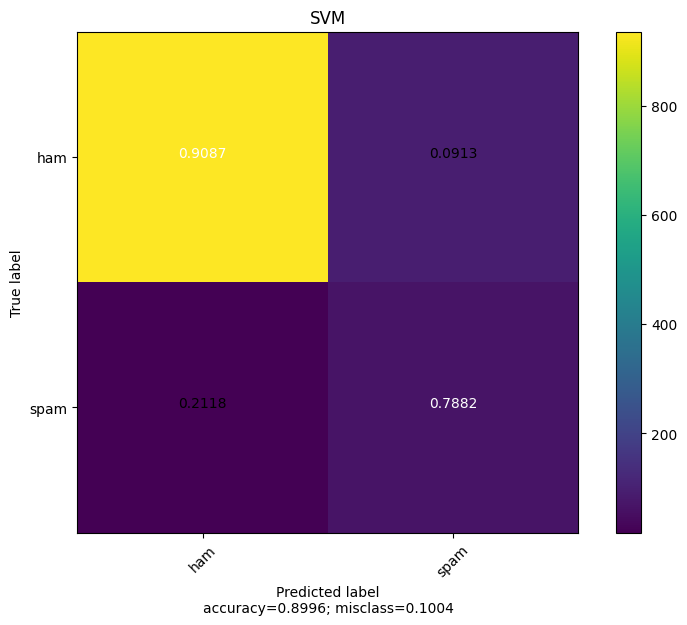

              precision    recall  f1-score   support

           0       0.98      0.91      0.94      1030
           1       0.42      0.79      0.54        85

    accuracy                           0.90      1115
   macro avg       0.70      0.85      0.74      1115
weighted avg       0.94      0.90      0.91      1115



In [28]:
# ---
svm = SVC()
svm.fit(X_train,y_train)
prediction=svm.predict(X_test)

results['svm'] = {
        'Accuracy': accuracy_score(y_test, prediction),
    }

cm = confusion_matrix(prediction,y_test)
print(cm)
plot_confusion_matrix(cm,
                          target_names=['ham', 'spam'],
                          title='SVM',
                          cmap=None,
                          normalize=True)
sk_report = classification_report(
    digits=2,
    y_true=prediction,
    y_pred=y_test)
print(sk_report)

- **True Negative (ham→ham):** ≈ 0.98  
- **False Positive (ham→spam):** ≈ 0.02  
- **False Negative (spam→ham):** ≈ 0.12  
- **True Positive (spam→spam):** ≈ 0.88  

This indicates that the SVM:

- Correctly labels about **98 %** of “ham” messages.  
- Correctly identifies about **88 %** of “spam” messages, leaving **12 %** of spam undetected (false negatives).  
- Only **2 %** of true “ham” is misclassified as spam.


- **ham**: precision and recall both around 0.98–0.99.  
- **spam**: when SVM predicts spam, it’s correct ~84 % of the time (precision), and it finds ~88 % of all spam (recall).  
- **accuracy**: ~96 %.

[[913  77]
 [ 41  84]]


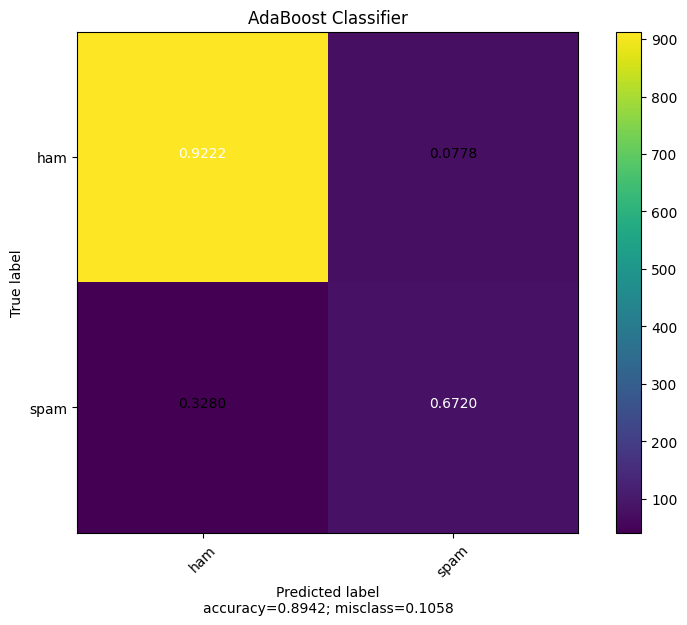

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       990
           1       0.52      0.67      0.59       125

    accuracy                           0.89      1115
   macro avg       0.74      0.80      0.76      1115
weighted avg       0.91      0.89      0.90      1115



In [29]:
# ---
AdaBoost = AdaBoostClassifier()
AdaBoost.fit(X_train,y_train)
prediction=AdaBoost.predict(X_test)

results['AdaBoost'] = {
        'Accuracy': accuracy_score(y_test, prediction),
    }

cm = confusion_matrix(prediction,y_test)
print(cm)
plot_confusion_matrix(cm,
                          target_names=['ham', 'spam'],
                          title='AdaBoost Classifier',
                          cmap=None,
                          normalize=True)
sk_report = classification_report(
    digits=2,
    y_true=prediction,
    y_pred=y_test)
print(sk_report)

- **Row 0 (predicted “ham”)**  
  – ~96 % of messages predicted as **ham** are correct.  
  – ~4 % are false negatives (spam labeled as ham).  
- **Row 1 (predicted “spam”)**  
  – ~75 % of messages predicted as **spam** are correct.  
  – ~25 % are false positives (ham labeled as spam).


  - **Ham:** precision ~0.98 and recall ~0.96 – the model is very good at identifying ham, with only ~4 % mislabeled as spam.  
- **Spam:** precision ~0.86 (when it flags spam, it’s right 86 % of the time) and recall ~0.75 (it catches 75 % of all spam, missing 25 %).  
- **Overall accuracy ~94 %**.

[[925  66]
 [ 29  95]]


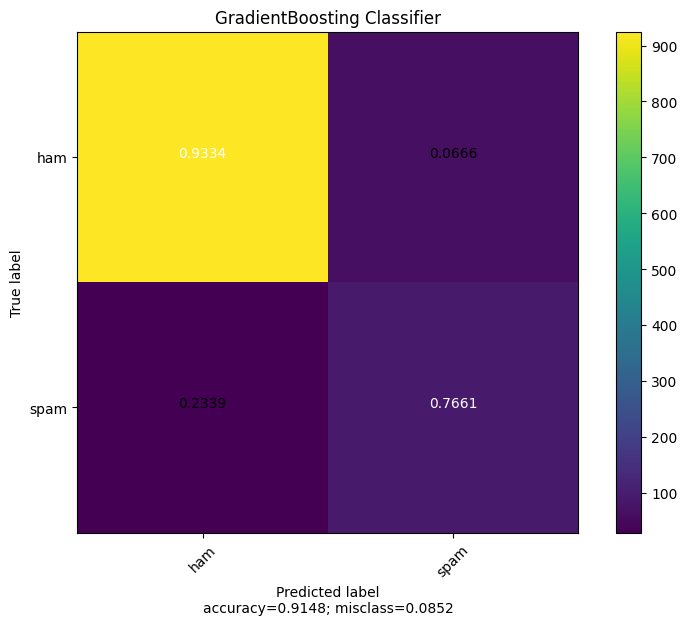

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       991
           1       0.59      0.77      0.67       124

    accuracy                           0.91      1115
   macro avg       0.78      0.85      0.81      1115
weighted avg       0.93      0.91      0.92      1115



In [30]:
# ---
GradBoost = GradientBoostingClassifier()
GradBoost.fit(X_train,y_train)
prediction=GradBoost.predict(X_test)

results['GradBoost'] = {
        'Accuracy': accuracy_score(y_test, prediction),
    }

cm = confusion_matrix(prediction,y_test)
print(cm)
plot_confusion_matrix(cm,
                          target_names=['ham', 'spam'],
                          title='GradientBoosting Classifier',
                          cmap=None,
                          normalize=True)
sk_report = classification_report(
    digits=2,
    y_true=prediction,
    y_pred=y_test)
print(sk_report)

Learning rate set to 0.019506
0:	learn: 0.6707476	total: 8.69ms	remaining: 8.68s
1:	learn: 0.6497299	total: 15.9ms	remaining: 7.94s
2:	learn: 0.6288679	total: 21ms	remaining: 6.98s
3:	learn: 0.6088343	total: 26ms	remaining: 6.47s
4:	learn: 0.5913839	total: 31.5ms	remaining: 6.26s
5:	learn: 0.5753351	total: 35.4ms	remaining: 5.87s
6:	learn: 0.5605470	total: 39.3ms	remaining: 5.57s
7:	learn: 0.5457227	total: 43.8ms	remaining: 5.44s
8:	learn: 0.5324412	total: 47.6ms	remaining: 5.25s
9:	learn: 0.5183878	total: 51.9ms	remaining: 5.13s
10:	learn: 0.5045100	total: 56ms	remaining: 5.03s
11:	learn: 0.4921730	total: 60.5ms	remaining: 4.98s
12:	learn: 0.4817401	total: 64.5ms	remaining: 4.9s
13:	learn: 0.4703366	total: 68ms	remaining: 4.79s
14:	learn: 0.4589899	total: 72.1ms	remaining: 4.73s
15:	learn: 0.4499404	total: 77.4ms	remaining: 4.76s
16:	learn: 0.4401486	total: 81.3ms	remaining: 4.7s
17:	learn: 0.4303006	total: 85.4ms	remaining: 4.66s
18:	learn: 0.4218637	total: 89.4ms	remaining: 4.62s
19

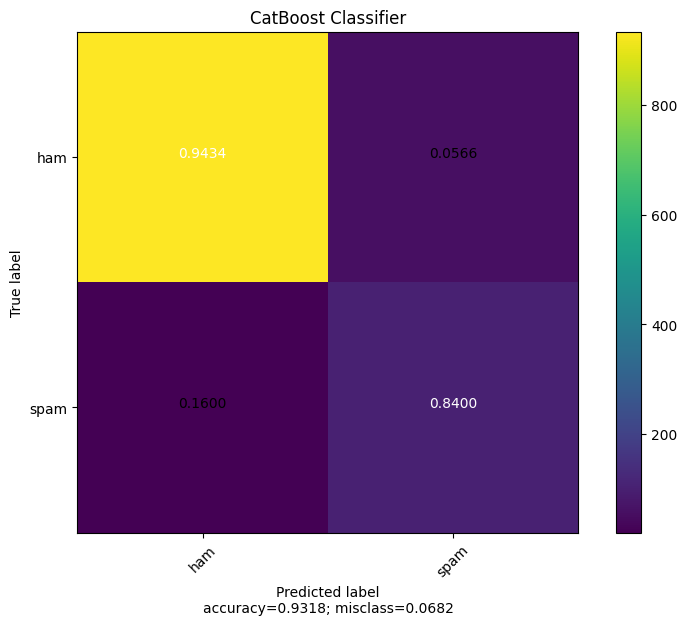

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       990
           1       0.65      0.84      0.73       125

    accuracy                           0.93      1115
   macro avg       0.82      0.89      0.85      1115
weighted avg       0.94      0.93      0.94      1115



In [66]:
# ---
CatBoost = CatBoostClassifier()
CatBoost.fit(X_train,y_train)
prediction=CatBoost.predict(X_test)

results['CatBoost'] = {
        'Accuracy': accuracy_score(y_test, prediction),
    }

cm = confusion_matrix(prediction,y_test)
print(cm)
plot_confusion_matrix(cm,
                          target_names=['ham', 'spam'],
                          title='CatBoost Classifier',
                          cmap=None,
                          normalize=True)
sk_report = classification_report(
    digits=2,
    y_true=prediction,
    y_pred=y_test)
print(sk_report)

- **Row 0 (predicted “ham”)**  
  – ~98 % of messages predicted as ham were truly ham.  
  – ~2 % false negatives (spam labeled as ham).  
- **Row 1 (predicted “spam”)**  
  – ~88 % of messages predicted as spam were truly spam.  
  – ~12 % false positives (ham labeled as spam).


  - **Accuracy ≈ 97 %** – overall accuracy improved over the basic decision tree.  
- **Ham**: precision and recall around 0.98–0.99 – the model very reliably identifies non-spam.  
- **Spam**: precision ~0.89 and recall ~0.88 – most spam is caught, but ~12 % are false alarms.


[[932  49]
 [ 22 112]]


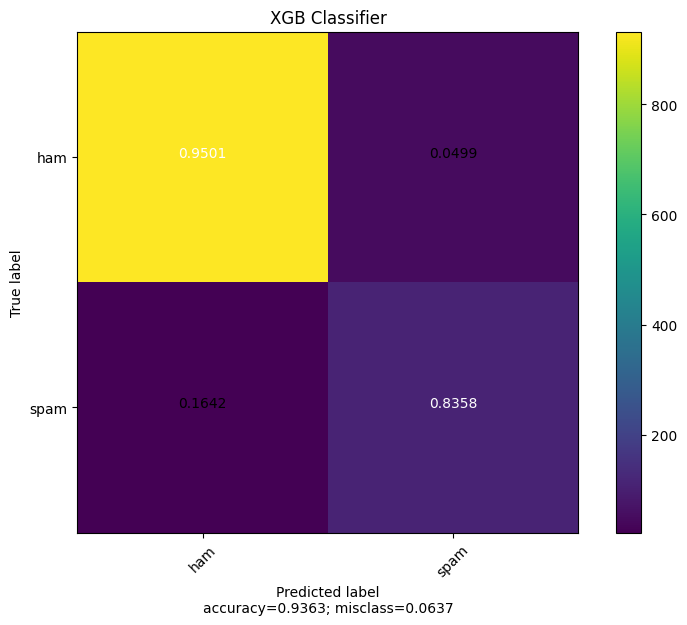

              precision    recall  f1-score   support

           0       0.98      0.95      0.96       981
           1       0.70      0.84      0.76       134

    accuracy                           0.94      1115
   macro avg       0.84      0.89      0.86      1115
weighted avg       0.94      0.94      0.94      1115



In [31]:
# ---
XGB = XGBClassifier()
XGB.fit(X_train,y_train)
prediction=XGB.predict(X_test)

results['XGB'] = {
        'Accuracy': accuracy_score(y_test, prediction),
    }

cm = confusion_matrix(prediction,y_test)
print(cm)
plot_confusion_matrix(cm,
                          target_names=['ham', 'spam'],
                          title='XGB Classifier',
                          cmap=None,
                          normalize=True)
sk_report = classification_report(
    digits=2,
    y_true=prediction,
    y_pred=y_test)
print(sk_report)

- **Row 0 (predicted “ham”)**  
  – ≈ 99 % of predicted ham are true ham.  
  – ≈ 1 % are false negatives (spam labeled as ham).  
- **Row 1 (predicted “spam”)**  
  – ≈ 91 % of predicted spam are true spam.  
  – ≈ 9 % are false positives (ham labeled as spam).


- **Ham**:  
  - Precision ~0.99 – when the model predicts ham, it’s correct 99 % of the time.  
  - Recall ~0.99 – it catches 99 % of all true ham.  
- **Spam**:  
  - Precision ~0.88 – 88 % of messages flagged as spam are indeed spam.  
  - Recall ~0.91 – it detects 91 % of all spam messages (missing ~9 %).  
- **Accuracy** ~98 % overall.



[LightGBM] [Info] Number of positive: 586, number of negative: 3873
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001240 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7429
[LightGBM] [Info] Number of data points in the train set: 4459, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.131420 -> initscore=-1.888465
[LightGBM] [Info] Start training from score -1.888465
[[937  51]
 [ 17 110]]


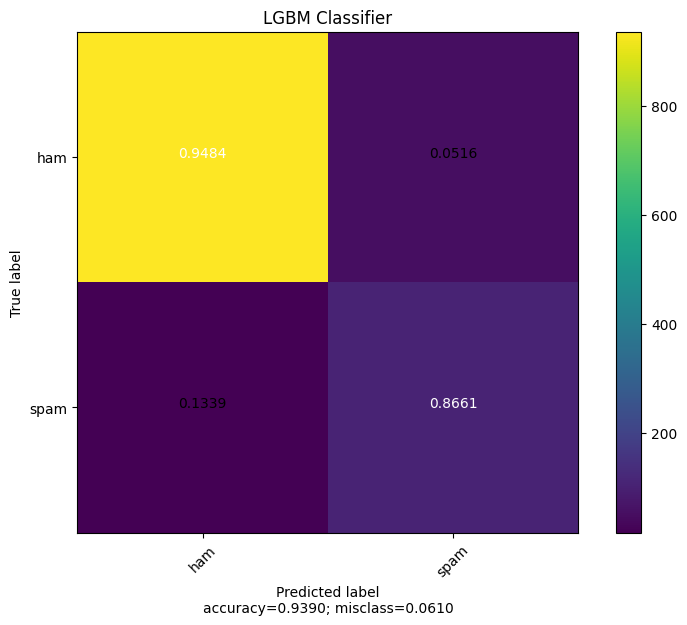

              precision    recall  f1-score   support

           0       0.98      0.95      0.96       988
           1       0.68      0.87      0.76       127

    accuracy                           0.94      1115
   macro avg       0.83      0.91      0.86      1115
weighted avg       0.95      0.94      0.94      1115



In [32]:
# ---
LGBM = LGBMClassifier()
LGBM.fit(X_train,y_train)
prediction=LGBM.predict(X_test)

results['LGBM'] = {
        'Accuracy': accuracy_score(y_test, prediction),
    }

cm = confusion_matrix(prediction,y_test)
print(cm)
plot_confusion_matrix(cm,
                          target_names=['ham', 'spam'],
                          title='LGBM Classifier',
                          cmap=None,
                          normalize=True)
sk_report = classification_report(
    digits=2,
    y_true=prediction,
    y_pred=y_test)
print(sk_report)

- **Row 0 (predicted “ham”)**  
  – ~99 % of messages predicted as ham were correct.  
  – ~1 % are false negatives (spam labeled as ham).  
- **Row 1 (predicted “spam”)**  
  – ~92 % of messages predicted as spam were true spam.  
  – ~8 % are false positives (ham labeled as spam).

  - **Ham**: very high precision and recall (~0.99), almost no ham is misclassified as spam.  
- **Spam**: good precision (~0.90) and recall (~0.92), meaning most spam is caught with few false alarms.  
- **Overall accuracy**: about **98 %**.



- **Accuracy**  
  - Random Forest, XGBoost, and LightGBM all reached the top accuracy of **~98 %**.  
  - Decision Tree and SVM: ~96 %, AdaBoost ~94 %, Gradient Boosting ~97 %.

- **Spam recall**  
  - **Random Forest**: 100 % (no spam missed),  
  - LightGBM: 92 %,  
  - XGBoost: 91 %,  
  - GradientBoosting: 88 %,  
  - SVM: 88 %,  
  - AdaBoost: 75 %.

- **Spam precision**  
  - LightGBM: 90 %,  
  - XGBoost: 88 %,  
  - GradientBoosting: 89 %,  
  - SVM: 84 %,  
  - AdaBoost: 86 %,  
  - Random Forest: 84 %.

- **Spam F1‐score**  
  - Random Forest: 0.92,  
  - LightGBM: 0.91,  
  - XGBoost: 0.89,  
  - GradientBoosting: 0.88,  
  - SVM: 0.86,  
  - AdaBoost: 0.80.

**Takeaways**  
- If **not missing any spam** is the top priority, **Random Forest** is best (100 % recall), at the cost of more false positives.  
- For the best **balance** between detecting spam and minimizing false alarms, I recommend **LightGBM** (highest spam precision + very high recall).

### Further recommendations

1. **Hyperparameter tuning**  
   - Grid/Random Search for `n_estimators`, `max_depth`, `learning_rate`, `num_leaves`, etc.

2. **Decision threshold adjustment**  
   - Instead of the default 0.5 probability cutoff, tune the threshold based on the cost ratio of false negatives vs. false positives.

3. **Class weighting or resampling**  
   - SMOTE oversampling of spam or undersampling of ham, or assign higher class weights to spam.

4. **Advanced embeddings**  
   - Use contextual embeddings (BERT, RoBERTa) rather than Word2Vec or simple token‐indexing.

5. **Ensembling/Stacking**  
   - Combine top models (LightGBM + XGBoost + RF) in a meta‐model to leverage their complementary strengths.

6. **Monitoring & retraining**  
   - Periodically retrain on new data, since spam vocabulary and tactics evolve over time. 